# Noble Rats - Big Ideas Final

## Introduction

As the noble rats of the city of pittsburgh, we've made it our goal to identify the stinkiest neighbourhood in the city. From WPRDC we found three datasets that will reveal to us the best/stinkiest neigborhood.

**Smart Trash Dataset**

In [7]:
import pandas as pd

smart_trash = pd.read_csv("smart_trash.csv") 
smart_trash.head()

,container_id,receptacle_model_id,assignment_date,last_updated_date,group_name,address,city,state,zip,neighborhood,dpw_division,council_district,ward,fire_zone,x,y
0,1,74,2017-09-14T13:24:40,2022-11-24T13:17:19,1st Division,122 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.004018,40.456073
1,2,74,2017-09-14T13:24:40,2022-11-29T01:55:53,1st Division,2507 Brighton Rd,Pittsburgh,Pennsylvania,15212,Marshall-Shadeland,1.0,1.0,27.0,1-9,-80.025132,40.467213
2,3,74,2017-09-14T13:24:40,2022-04-14T01:59:18,1st Division,1300 Federal St,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.006872,40.456625
3,4,74,2017-09-14T13:24:40,2022-10-24T12:40:24,1st Division,110 Federal St,Pittsburgh,Pennsylvania,15212,Allegheny Center,1.0,1.0,22.0,1-6,-80.006250,40.454520
4,5,74,2017-09-19T12:22:45,2022-11-28T01:58:21,1st Division,490 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.002083,40.456444


**Illegal Dumpsite Dataset**

In [17]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as geo

illegaldumpsites = pd.read_csv("illegaldumpsites.csv")
illegaldumpsites.head()

,site_name,Status,City,Neighborhood,estimated_tons,location_description,latitude,longitude,Unnamed: 8
0,St. Martin Street,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42221971,-79.99022525,NaN
1,Brosville Street,Surveyed,Pittsburgh,Allentown,3,NaN,40.42370101,-79.98657393,NaN
2,McCain Street,Surveyed,Pittsburgh,Allentown,1,NaN,40.42427063,-79.99022675,NaN
3,Ceres Way,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42327242,-79.99248958,NaN
4,Eureka Street,Completed,Pittsburgh,Allentown,0.1,NaN,40.42372131,-79.99478912,NaN


**Beautify The Burgh Dataset**

In [9]:
litter_control= pd.read_csv("Pittsburgh_Beautify_The_Burgh.csv")
litter_control.head()

,FID,Group_,Partner,Neighborhood,Council,IDNumber,SHAPE_Length,SHAPE_Area
0,1,Heinz History Center,None,Strip District,7,1,1506.543864,96096.968552
1,2,Allegheny County Adult Probation,None,Arlington,3,2,1829.404709,24067.037087
2,3,West End Children's Center,None,Elliott,2,3,1671.511468,33866.780411
3,4,PA Resource Council,None,South Side Flats,3,4,1101.699628,71281.121826
4,6,Spring Hill Civic League,None,Spring Hill-City View,2,5,3923.923120,124124.679277


## The Metric

In our Smart Trash dataset, we chose to measure the best by how many smart trash containers are located in each neighborhood. The one with the most containers will be the worst and the one with the least number of containers will be the best.

For our Illegal dumpsites dataset, we will measure it by the amount of illegally dumped trash in a neighborhood. The least amount of trash will be the worst and the most amount of dumped trash will be the best.

With our Beautify The Burgh dataset, we want to identify the best by the neighborhood that has the least groups for litter control and the worst by the neighborhood with the most groups for litter control.

## The Best Neighborhood

In the smart trash dataset, I took the neighborhood column and counted the value of each time a specific neighborhood was entered. Each smart trash container was entered into the dataset by the neighborhoods they are located in, so this dataset had many duplicate values in the neighborhood column.

In [5]:
data = smart_trash['neighborhood'].value_counts()
data

Shadyside              76
East Liberty           68
Squirrel Hill South    63
Bloomfield             58
North Shore            53
                       ..
Mt. Oliver              1
East Carnegie           1
Windgap                 1
South Shore             1
Swisshelm Park          1
Name: neighborhood, Length: 79, dtype: int64

Now that i know the exact number of smart trash cointainers in each neighborhood, i can tell that the worst neighborhood for our Noble Rat community to be is in Shadyside.

To find out the best (the neighborhood with the least smart trash containers), i looked at all the neighborhoods with just one smart trash container. The best neigborhood for us to be in is between Northview Heights, Oakwood, St.Clair, Bedford Dwellings, Mt. Oliver, East carnegie, Windgap, Souuth Shore, and Swisshelm Park.

In [7]:
smart_trash['neighborhood'].value_counts().tail(10)

Point Breeze North    2
Northview Heights     1
Oakwood               1
St. Clair             1
Bedford Dwellings     1
Mt. Oliver            1
East Carnegie         1
Windgap               1
South Shore           1
Swisshelm Park        1
Name: neighborhood, dtype: int64

I plotted the data so we can see it in a different perspective.

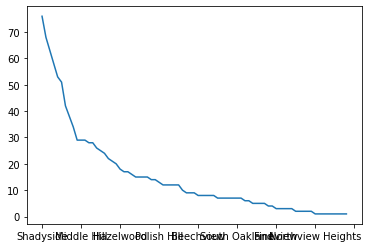

In [12]:
data.plot()

In the Pittsburgh Beautify The Burgh dataset, I first filtered out the unnecessary columns, 


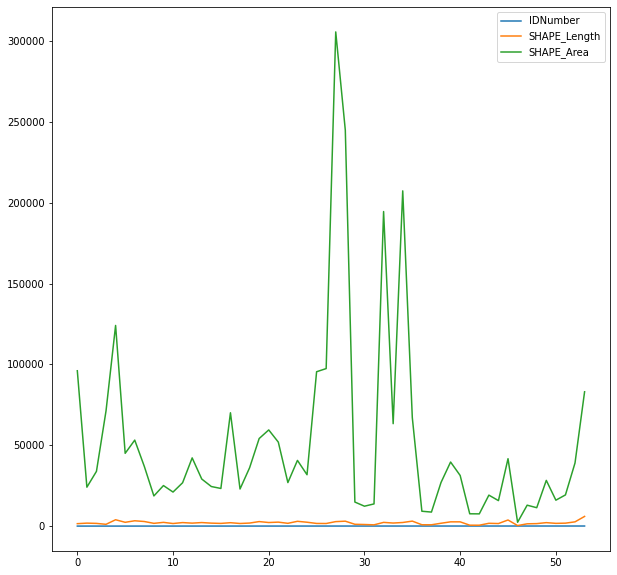

In [10]:
litter_control.drop('Council', axis = 1, inplace = True)
litter_control.drop('FID', axis = 1, inplace = True)
litter_control.plot(figsize = (10,10))

Then I analyzed using pandas which neighborhood had the most groups, and which one had the least groups for litter control

In [11]:
litter_control.shape
litter_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Group_        54 non-null     object 
 1   Partner       54 non-null     object 
 2   Neighborhood  54 non-null     object 
 3   IDNumber      54 non-null     int64  
 4   SHAPE_Length  54 non-null     float64
 5   SHAPE_Area    54 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.7+ KB


In [12]:
litter_control['Neighborhood'].value_counts().idxmax()

'Mount Washington'

Hence, Mount Washington is the "worst" neighborhood in this dataset alone

In [13]:
litter_control.value_counts('Neighborhood')

Neighborhood
Mount Washington             9
Central Oakland              7
South Oakland                6
North Oakland                5
North Point Breeze           3
West Oakland                 2
Strip District               2
Carrick                      2
Allentown                    2
Spring Hill-City View        1
South Side Flats             1
Sheraden                     1
Shadyside                    1
Point Breeze                 1
Allegheny West               1
Lower Lawrenceville          1
Hazelwood                    1
Greenfield                   1
Elliott                      1
East Liberty                 1
Central Business District    1
Bluff/Uptown                 1
Beltzhoover                  1
Arlington                    1
Homewood South               1
dtype: int64

The "best" neighborhood(s) in this dataset are all the neighborhoods that have only 1 litter control group, .......

In [15]:
query_mask = litter_control['Neighborhood']=="Beltzhoover"
query_mask

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25     True
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
Name: Neighborhood, dtype: bool

In [16]:
litter_control.iloc[25]


Group_          St. Paul AME Beltzhoover
Partner                             None
Neighborhood                 Beltzhoover
IDNumber                              26
SHAPE_Length                 1639.648261
SHAPE_Area                  95490.078141
Name: 25, dtype: object

Using the JSON file in the beautify the burgh dataset to print a visual of the neighborhoods covered by the groups

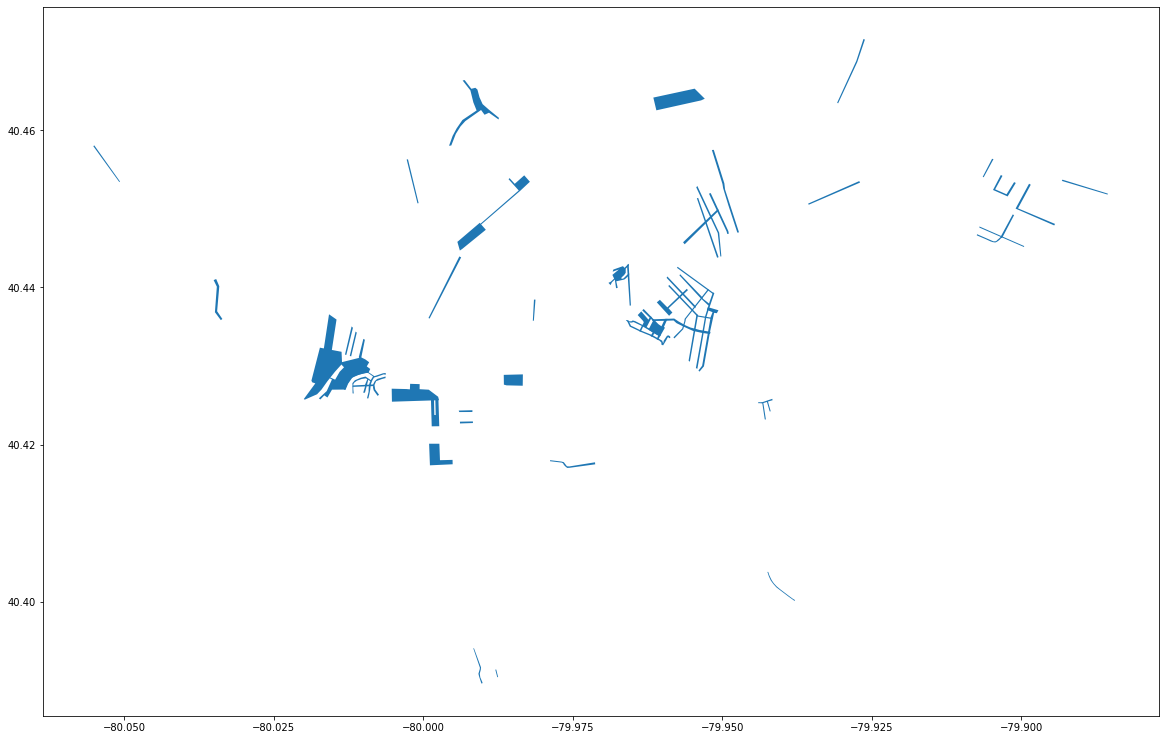

In [18]:
import json
import geopandas as gpd
%matplotlib inline
data = gpd.read_file("Pittsburgh_Beautify_The_Burgh.geojson")
data.plot(figsize=(20,20))

In the illegal dumpsites dataset started by getting rid of the location descriptions since they aren't relevant to the amount of trash dumped. 

In [18]:
illegaldumpsites.drop('location_description', axis =1, inplace = True)

In [19]:
illegaldumpsites.head()

,site_name,Status,City,Neighborhood,estimated_tons,latitude,longitude,Unnamed: 8
0,St. Martin Street,Surveyed,Pittsburgh,Allentown,0.5,40.42221971,-79.99022525,NaN
1,Brosville Street,Surveyed,Pittsburgh,Allentown,3,40.42370101,-79.98657393,NaN
2,McCain Street,Surveyed,Pittsburgh,Allentown,1,40.42427063,-79.99022675,NaN
3,Ceres Way,Surveyed,Pittsburgh,Allentown,0.5,40.42327242,-79.99248958,NaN
4,Eureka Street,Completed,Pittsburgh,Allentown,0.1,40.42372131,-79.99478912,NaN


I used the "estimated tons" values to calculate the total of trash per neighborhood. Before performing operations, the data had to be usable. I used the "dropna" within the "estimated tons" subset to get rid of any null values in the "estimated tons" column.

In [20]:
sites_with_tons = illegaldumpsites.dropna(subset = ['estimated_tons'])

Since the data set includes some data from cities other than Pittsburgh, i used a query mask to filter these data points out so that i would be left with only the Pittsburgh data.

In [21]:
query_mask = sites_with_tons['City'] == 'Pittsburgh'
pittsburgh = sites_with_tons[query_mask]
pittsburgh.head()

,site_name,Status,City,Neighborhood,estimated_tons,latitude,longitude,Unnamed: 8
0,St. Martin Street,Surveyed,Pittsburgh,Allentown,0.5,40.42221971,-79.99022525,NaN
1,Brosville Street,Surveyed,Pittsburgh,Allentown,3,40.42370101,-79.98657393,NaN
2,McCain Street,Surveyed,Pittsburgh,Allentown,1,40.42427063,-79.99022675,NaN
3,Ceres Way,Surveyed,Pittsburgh,Allentown,0.5,40.42327242,-79.99248958,NaN
4,Eureka Street,Completed,Pittsburgh,Allentown,0.1,40.42372131,-79.99478912,NaN


I made a copy of the pittsburgh data slice so that I could make changes to the data. 

In [22]:
copy_pittsburgh = pittsburgh.copy()

Since the estimated tons values are strings, I converted them to numeric values using .to_numeric(). Now, I can perform numerical operations on the data.

In [23]:
copy_pittsburgh["estimated_tons"] = copy_pittsburgh["estimated_tons"].apply(pd.to_numeric)

To find the total of tons of trash, I used the groupby and sum functions. With the groupby, I can find the sum of estimated tons per neighborhood. 

In [25]:
neighborhood_totals = copy_pittsburgh.groupby('Neighborhood').sum()
neighborhood_totals.head()

,estimated_tons,Unnamed: 8
Neighborhood,,
Allentown,10.4,0.0
Arlington,17.5,0.0
Banksville,1.0,0.0
Bedford Dwellings,1.0,0.0
Beechview,11.0,0.0


It is clear that Beltzhoover has the most illegally dumped trash by far.

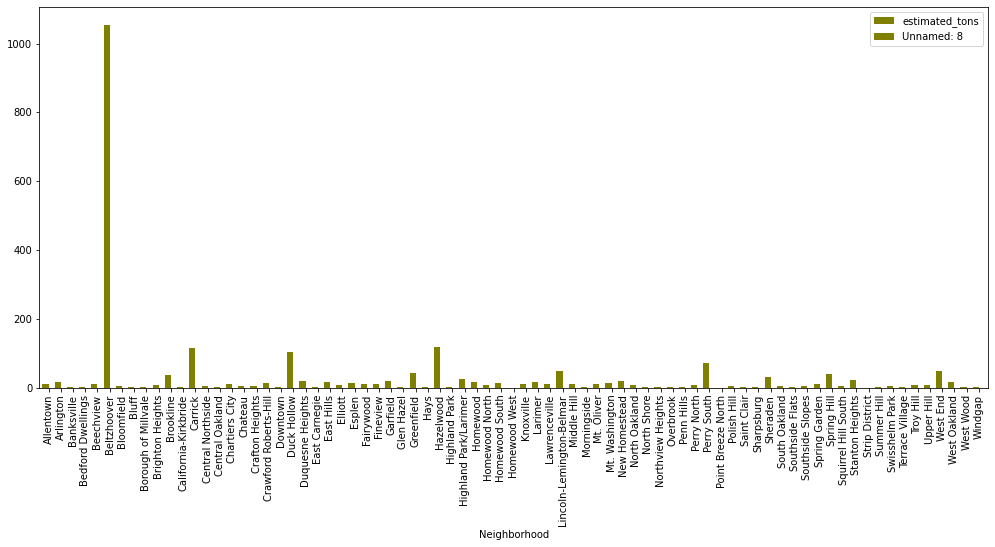

In [27]:
neighborhood_totals.plot.bar(figsize = (17,7), width = 1, color = 'olive' )

I also decided to look at how many entries Beltzhoover has to see if it was a frequently reported neighborhood. I ran the count function to get the amount of entries per neighborhood.

In [28]:
collection_counts = copy_pittsburgh.groupby("Neighborhood").count()
collection_counts.head()

,site_name,Status,City,estimated_tons,latitude,longitude,Unnamed: 8
Neighborhood,,,,,,,
Allentown,7,7,7,7,7,7,0
Arlington,9,9,9,9,9,9,0
Banksville,1,1,1,1,1,1,0
Bedford Dwellings,1,1,1,1,1,1,0
Beechview,8,8,8,8,7,7,0


Then, I used "loc" to find the amount of entries Beltzhoover has in estimated tons.

In [29]:
collection_counts.loc["Beltzhoover", "estimated_tons"]

36

Then, I ran the mean function to see the average of estimated tons entries. With 36 entries, Beltzhoover was above average by over 25.

In [30]:
collection_counts.mean()

site_name         7.844156
Status            7.844156
City              7.844156
estimated_tons    7.844156
latitude          7.818182
longitude         7.818182
Unnamed: 8        0.000000
dtype: float64

## Conclusion

As the Noble Rats of the city of pittsburgh, we have determined that the best neighborhood is Beltzhoover. It was chosen as a candidate in two out of our three datasets and in the third dataset it was fairly close to the stinkiests.

**Mofe's Conclusion**

My personal favorite neigborhood is Oakland because its the only one i know. My favorite neighborhood is different from the one the data showed because why would i want to live in a stinky neighborhood.

**Linda's Conclusion**

Although i've never been to Beltzhoover, it's clear to me that its the stinkiest neighborhood in Pittsburgh. I'm not from Pittsburgh, so I can only trust the data on this issue. I've only really spent time in Oakland and Shadyside, and neither were particulary stinky to me. Then again, i've never had the best sense of smell. In terms of Beltzhoover, i'll rely on the numbers until i get to smell it for myself.

**Greta's Conclusion**

In conclusion, I would generally agree that Beltzhoover is the stinkiest neighborhood. The beautify the burgh dataset that I worked with is not enough on its own to prove this. However, when combined with the data from the illegal dump sites, together they give a decent proof that Beltzhoover is far dirtier than a lot of the other neighborhoods.

My favorite neighborhood is Lawenceville because it is so walkable, and there are so many unique things to vist. It is close to several parks and trails, which is great for me because I love hiking.